In [2]:
import pandas as pd
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine, text
from sqlalchemy.engine import Engine
from sqlalchemy.orm import sessionmaker

In [3]:
load_dotenv()

PG_USER = os.getenv("DB_USER", "postgres")
PG_PASS = os.getenv("DB_PASSWORD", "postgres")
PG_HOST = os.getenv("DB_HOST", "localhost")
PG_PORT = os.getenv("DB_PORT", "5432")
PG_DB   = os.getenv("DB_DATABASE", "postgres")

DATABASE_URL = f"postgresql+psycopg2://{PG_USER}:{PG_PASS}@{PG_HOST}:{PG_PORT}/{PG_DB}"

In [4]:
engine: Engine = create_engine(
    DATABASE_URL,
    pool_pre_ping=True,
    future=True,  # optional but nice with SA 2.x APIs
)

In [20]:
query = '''
Select *
from interactions
'''
interactions = pd.read_sql(query, engine)

In [21]:
interactions

,id,visitor_id,session_id,channel,page,interaction,element,timestamp
0,1,ba6614e4-c49c-4d5a-8a05-f865ba3f4763,fc1ec366-b4b0-4b54-b78c-002d04d6ef84,Organic,landing,pageview,None,2025-01-01 00:21:34.362663+00:00
1,2,ba6614e4-c49c-4d5a-8a05-f865ba3f4763,fc1ec366-b4b0-4b54-b78c-002d04d6ef84,Organic,landing,click,content,2025-01-01 00:21:35.562663+00:00
2,3,ba6614e4-c49c-4d5a-8a05-f865ba3f4763,fc1ec366-b4b0-4b54-b78c-002d04d6ef84,Organic,content,pageview,None,2025-01-01 00:21:35.562663+00:00
3,4,ba6614e4-c49c-4d5a-8a05-f865ba3f4763,fc1ec366-b4b0-4b54-b78c-002d04d6ef84,Organic,content,click,landing,2025-01-01 00:21:36.762663+00:00
4,5,ba6614e4-c49c-4d5a-8a05-f865ba3f4763,fc1ec366-b4b0-4b54-b78c-002d04d6ef84,Organic,landing,pageview,None,2025-01-01 00:21:36.762663+00:00
...,...,...,...,...,...,...,...,...
3081,3082,36ddf2df-433a-4b12-b116-c42793e3163b,e2e37af6-bd97-4dad-8a22-473984825947,Paid,product,click,cart,2025-01-02 23:53:49.686773+00:00
3082,3083,36ddf2df-433a-4b12-b116-c42793e3163b,e2e37af6-bd97-4dad-8a22-473984825947,Paid,cart,pageview,None,2025-01-02 23:53:49.686773+00:00
3083,3084,36ddf2df-433a-4b12-b116-c42793e3163b,e2e37af6-bd97-4dad-8a22-473984825947,Paid,cart,click,remove_item,2025-01-02 23:53:50.886773+00:00
3084,3085,36ddf2df-433a-4b12-b116-c42793e3163b,e2e37af6-bd97-4dad-8a22-473984825947,Paid,cart,click,checkout,2025-01-02 23:53:51.086773+00:00


<Axes: xlabel='timestamp'>

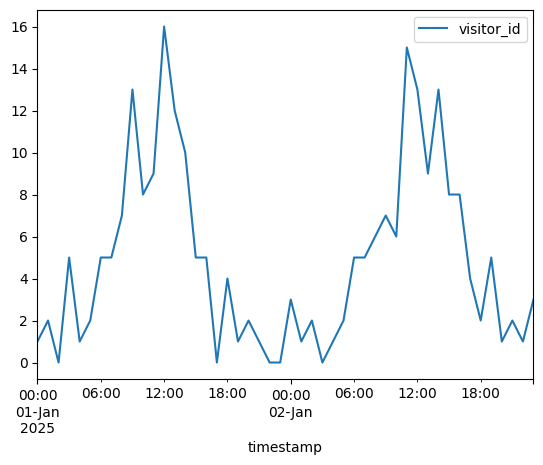

In [22]:
arrivals = interactions[['visitor_id','timestamp']].groupby('visitor_id').min().reset_index()
arrivals.groupby([pd.Grouper(key='timestamp',freq='h')]).count().plot()

In [17]:
query = '''
Select *
from visitors
'''
visitors = pd.read_sql(query, engine)

In [18]:
visitors['is_identified'].sum()

np.int64(13)

In [23]:
visitors

,visitor_id,created_at,channel,is_identified,identified_at,name,gender,age,email,signed_up,sign_up_timestamp,return_visitor,marketing_funnel_stage,stage_last_updated_date,converted,converted_timestamp
0,07fd3a19-d22b-4532-a5ea-3343afd40acc,2025-09-08 01:21:53.241645+00:00,None,False,None,None,None,NaN,None,False,NaT,False,Awareness,2025-09-08 01:21:53.241645+00:00,False,None
1,de1e2877-769d-4081-95c9-d4656cc7a08e,2025-09-08 01:21:53.718039+00:00,None,False,None,None,None,NaN,None,False,NaT,False,Awareness,2025-09-08 01:21:53.718039+00:00,False,None
2,ef1d88fc-445b-4cab-9c76-f66a03c80bf7,2025-09-08 01:21:53.816766+00:00,None,False,None,None,None,NaN,None,False,NaT,False,Awareness,2025-09-08 01:21:53.816766+00:00,False,None
3,e23ad628-7716-4c26-9e46-d15098ba6d78,2025-09-08 01:21:53.925657+00:00,None,False,None,None,None,NaN,None,False,NaT,False,Awareness,2025-09-08 01:21:53.925657+00:00,False,None
4,7c7b7f3e-4897-4bd9-bf74-3510c1f0aadb,2025-09-08 01:21:54.032867+00:00,None,False,None,None,None,NaN,None,False,NaT,False,Awareness,2025-09-08 01:21:54.032867+00:00,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,66ef3abc-8db6-4963-88a3-3452125fa5de,2025-09-08 01:22:17.949882+00:00,None,False,None,None,None,NaN,None,True,2025-01-02 19:23:48.082802+00:00,False,Consideration,2025-01-02 19:23:48.082802+00:00,False,None
232,91051177-42c7-45a6-b176-1c12c31eb36a,2025-09-08 01:22:18.247663+00:00,None,False,None,None,None,NaN,None,True,2025-01-02 20:25:02.558865+00:00,False,Consideration,2025-01-02 20:25:02.558865+00:00,False,None
233,5e185069-9a46-4b9c-9be4-91f2fad0c8b6,2025-09-08 01:22:18.363546+00:00,None,True,None,Shane Hubbard,Female,19.0,patrickarroyo@example.com,True,2025-01-02 21:48:32.872804+00:00,False,Signup,2025-01-02 21:48:32.872804+00:00,False,None
234,7b4fa60e-ac09-4247-bade-32502985455c,2025-09-08 01:22:18.907691+00:00,None,False,None,None,None,NaN,None,True,2025-01-02 23:01:50.000961+00:00,False,Consideration,2025-01-02 23:01:50.000961+00:00,False,None
